# Part 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import json
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

In [2]:
company = pd.read_excel('Part2 - Company.xlsx')

In [3]:
company.describe()

,A,B,C,D
count,61.000000,61.000000,61.000000,61.000000
mean,118.557377,116.639344,114.081967,114.459016
std,61.771494,57.897908,65.615368,63.144431
min,3.000000,5.000000,3.000000,3.000000
25%,61.000000,63.000000,59.000000,51.000000
50%,136.000000,138.000000,135.000000,132.000000
75%,171.000000,168.000000,174.000000,174.000000
max,200.000000,200.000000,200.000000,199.000000


In [4]:
company.shape

(61, 5)

In [5]:
company.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [6]:
company.dtypes

A           int64
B           int64
C           int64
D           int64
Quality    object
dtype: object

In [7]:
comp_data=company.copy()
comp_data=comp_data.dropna()

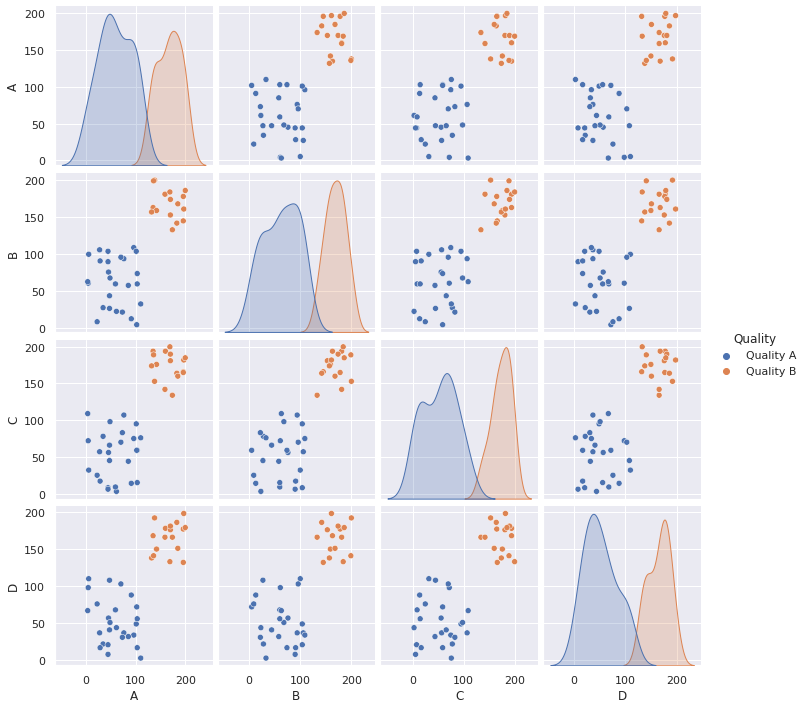

In [8]:
comp_data.shape
sns.pairplot(comp_data, hue='Quality')

In [9]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder = LabelEncoder()  

comp_data['Quality_Label'] = labelencoder.fit_transform(comp_data.Quality) # returns label encoded variable(s)


In [10]:
comp_data.head()

,A,B,C,D,Quality,Quality_Label
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0
6,34,28,78,22,Quality A,0


In [11]:
comp_data['Quality_Label'].value_counts()

0    26
1    17
Name: Quality_Label, dtype: int64

In [12]:
comp_data['Quality_Label'] = comp_data.Quality_Label.astype('category')

In [13]:
comp_data.groupby(["Quality_Label"]).count()

,A,B,C,D,Quality
Quality_Label,,,,,
0,26,26,26,26,26
1,17,17,17,17,17


In [14]:
comp_data.dtypes

A                   int64
B                   int64
C                   int64
D                   int64
Quality            object
Quality_Label    category
dtype: object

In [15]:
X = comp_data.drop(["Quality","Quality_Label"], axis = 1)
y = comp_data["Quality_Label"]
X.head()

,A,B,C,D
0,47,27,45,108
1,174,133,134,166
3,61,23,3,44
4,59,60,9,68
6,34,28,78,22


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,A,B,C,D
count,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01
mean,-5.163828e-18,-5.680211e-17,-2.581914e-17,-1.032766e-16
std,1.011835e+00,1.011835e+00,1.011835e+00,1.011835e+00
min,-1.628170e+00,-1.677706e+00,-1.498676e+00,-1.517013e+00
25%,-9.018088e-01,-7.478315e-01,-7.695082e-01,-9.342991e-01
50%,-1.036562e-02,-7.155906e-02,-2.706041e-01,-1.411612e-01
75%,9.553645e-01,9.428496e-01,9.958446e-01,9.999861e-01
max,1.623947e+00,1.619122e+00,1.525450e+00,1.639352e+00


In [17]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [18]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [19]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [20]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

1.0

In [21]:
predicted_labels

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [22]:
scores =[]
for k in range(1,10):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

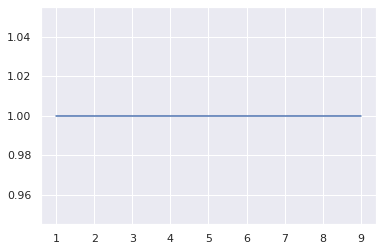

In [23]:
plt.plot(range(1,10),scores)

In [24]:
XScaled.shape

(43, 4)

In [25]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[1.02380952 0.74971035 0.81475002 0.7692498 ]
 [0.74971035 1.02380952 0.84392467 0.78254782]
 [0.81475002 0.84392467 1.02380952 0.82327864]
 [0.7692498  0.78254782 0.82327864 1.02380952]]


In [26]:

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(XScaled)

PCA(n_components=4)

In [27]:
print(pca.explained_variance_)

[3.41646973 0.27706804 0.23985208 0.16184823]


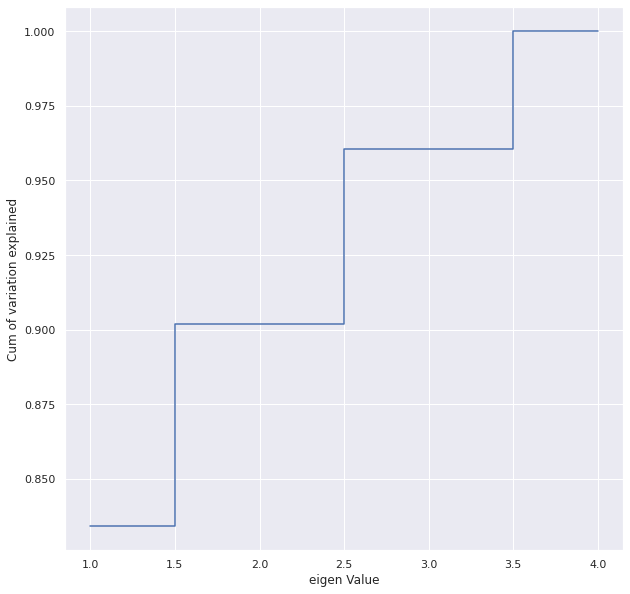

In [28]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.step(list(range(1,5)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [29]:
pca3 = PCA(n_components=3)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.49082127  0.49769652  0.51381888  0.49737593]
 [-0.79680439  0.58840207  0.09625227  0.09808806]
 [-0.24682715 -0.4514046  -0.1450751   0.84514109]]
[0.83425424 0.06765615 0.05856853]


In [30]:
Xpca3.shape

(43, 3)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.30, random_state=1)

In [32]:
scores =[]
for k in range(1,10):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

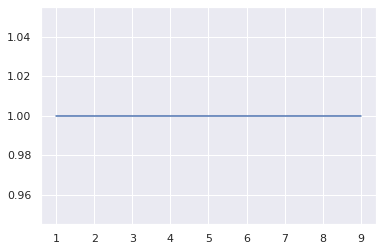

In [33]:
plt.plot(range(1,10),scores)

Even after dimentionality reduction there is no change in accuracy of data

In [34]:
NNH1 = KNeighborsClassifier(n_neighbors = 5, weights = 'distance' )
NNH1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [35]:
predicted_labels = NNH1.predict(X_test)
NNH1.score(X_test, y_test)

1.0

Thus NNH1 model can impute values of attribute Quality whenever empty